# **Myntra _sample:**



```
const http = require('http');

const server = http.createServer((req, res) => {
  console.log(req.url, req.method);

  // Set the content type to HTML
  res.setHeader('Content-Type', 'text/html');

  // Common navigation bar HTML
  const navBar = `
    <nav style="background-color: #ff3f6c; padding: 15px; text-align: center;">
      <a href="/home" style="color: white; text-decoration: none; margin: 0 20px; font-size: 18px; font-weight: bold;">Home</a>
      <a href="/men" style="color: white; text-decoration: none; margin: 0 20px; font-size: 18px; font-weight: bold;">Men</a>
      <a href="/women" style="color: white; text-decoration: none; margin: 0 20px; font-size: 18px; font-weight: bold;">Women</a>
      <a href="/kids" style="color: white; text-decoration: none; margin: 0 20px; font-size: 18px; font-weight: bold;">Kids</a>
      <a href="/cart" style="color: white; text-decoration: none; margin: 0 20px; font-size: 18px; font-weight: bold;">Cart</a>
    </nav>
  `;

  // Content based on the route
  let content = '<h1 style="text-align: center; color: #ff3f6c;">Welcome to Myntra</h1>';
  if (req.url === '/home') {
    content = '<h1 style="text-align: center; color: #ff3f6c;">Welcome to Home</h1>';
  } else if (req.url === '/men') {
    content = '<h1 style="text-align: center; color: #ff3f6c;">Welcome to Men</h1>';
  } else if (req.url === '/women') {
    content = '<h1 style="text-align: center; color: #ff3f6c;">Welcome to Women</h1>';
  } else if (req.url === '/kids') {
    content = '<h1 style="text-align: center; color: #ff3f6c;">Welcome to Kids</h1>';
  } else if (req.url === '/cart') {
    content = '<h1 style="text-align: center; color: #ff3f6c;">Welcome to Cart</h1>';
  }

  // Complete HTML page with navigation bar and content
  res.write(`
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Myntra</title>
  <style>
    body { margin: 0; font-family: Arial, sans-serif; }
    nav a:hover { color: #ffebf0; }
  </style>
</head>
<body>
  ${navBar}
  <div style="padding: 20px;">
    ${content}
  </div>
</body>
</html>
  `);
  res.end();
});

server.listen(3001, () => {
  console.log('Server running on address http://localhost:3001');
});
```



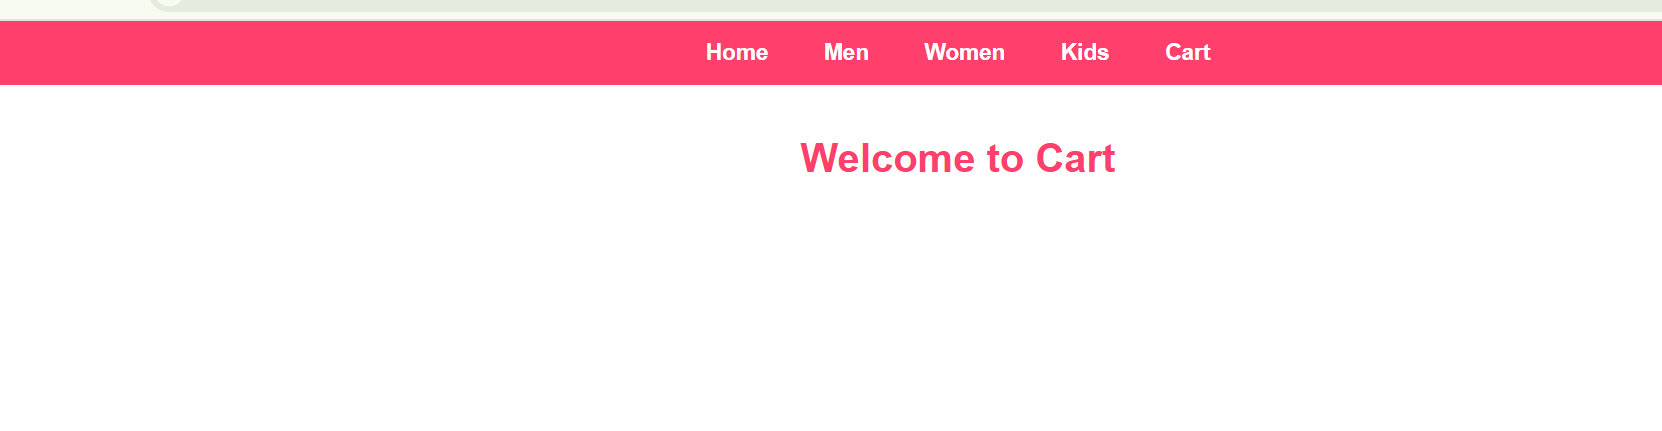

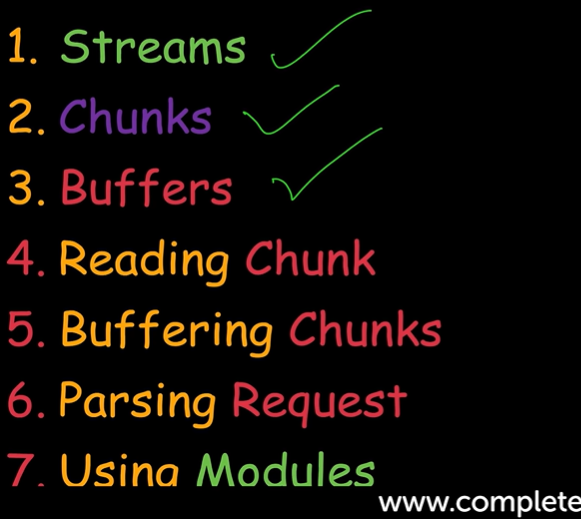

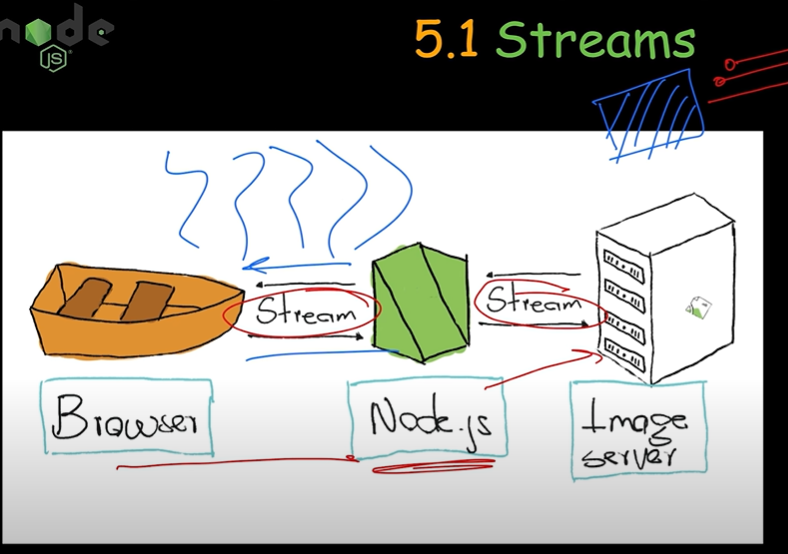

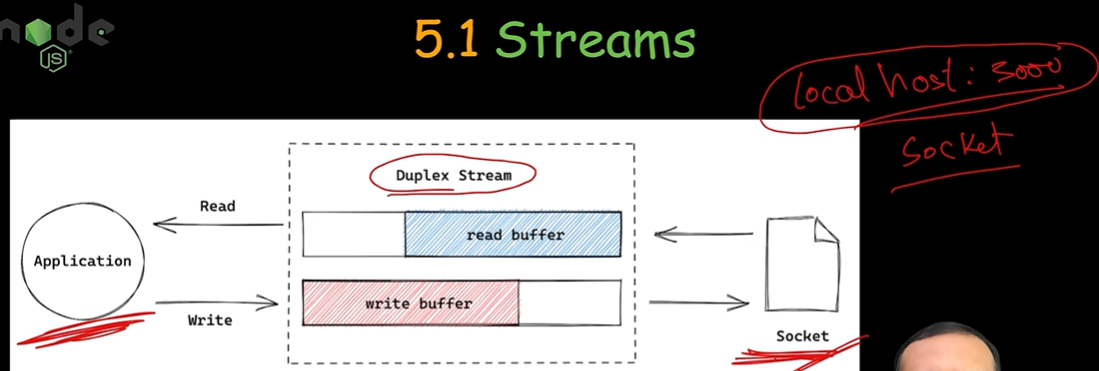

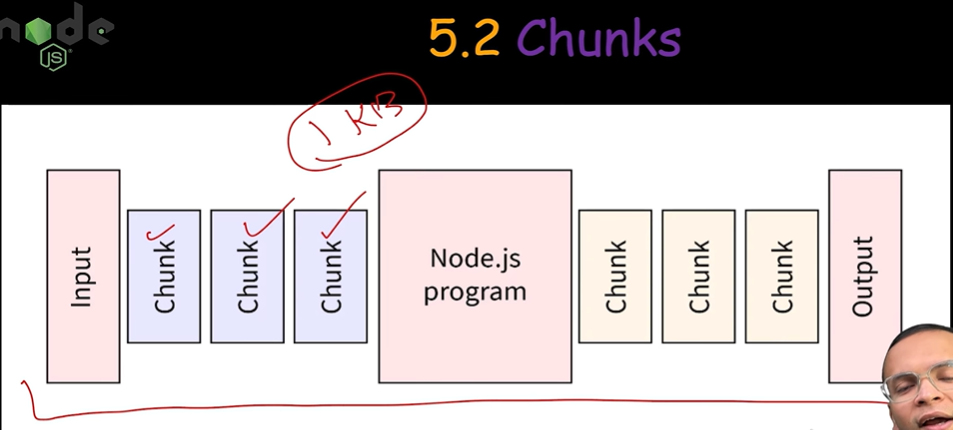

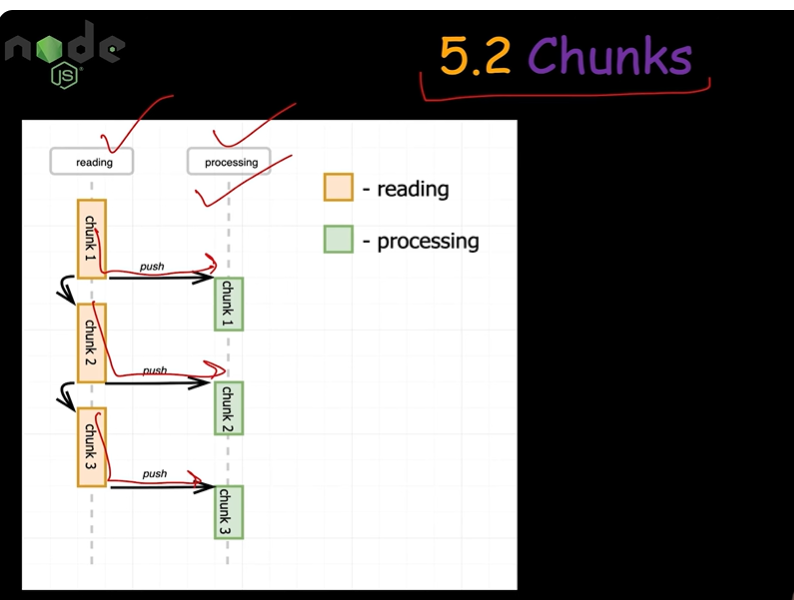

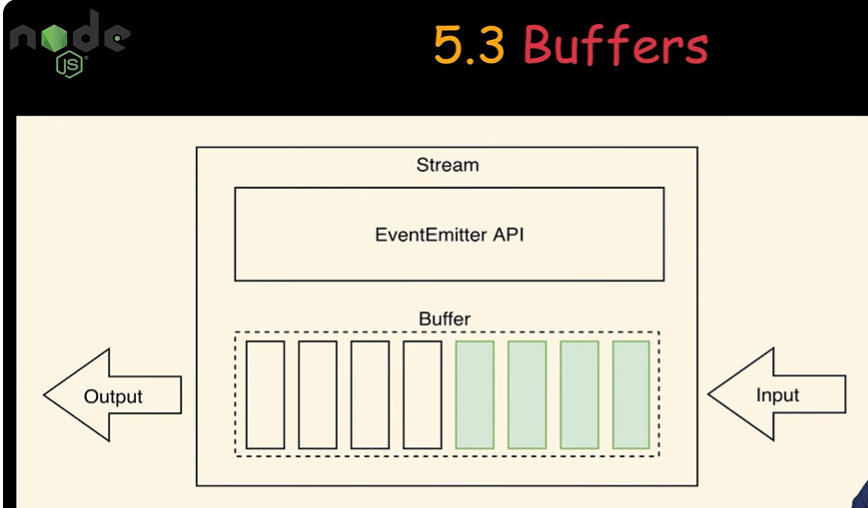

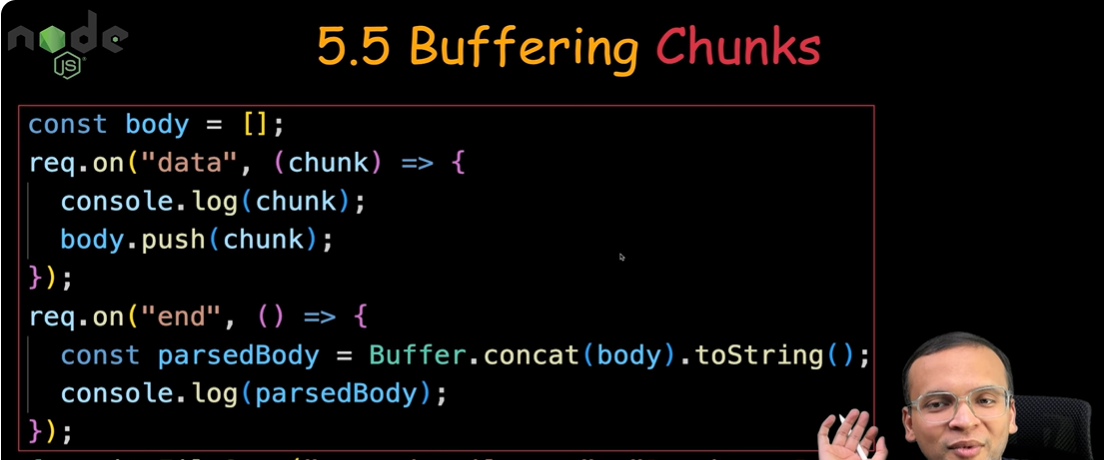

# **body=[] use**

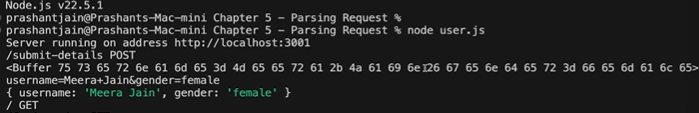

# **username=ajaykarre+gender:male**

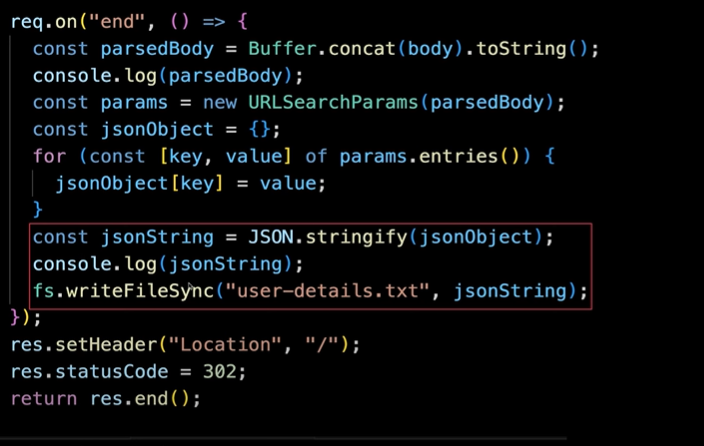

# **Task 1**

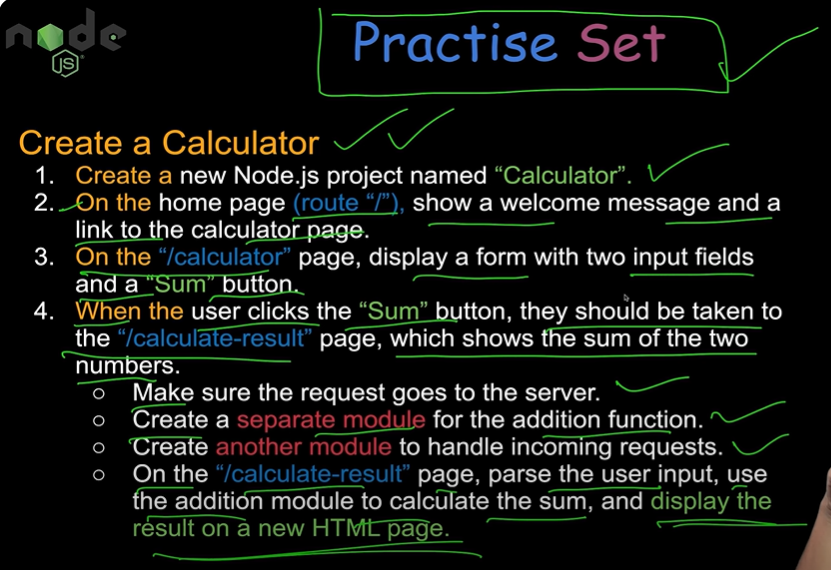

# **app.js**



```
const http = require('http');
const { requestHandler } = require('./handler');

const server = http.createServer(requestHandler);

const PORT = 3000;
server.listen(PORT, () => {
  console.log(`Server running on address http://localhost:${PORT}`);
});
```



# **handler.js**



```
const {sumRequestHandler} = require('./sum');

const requestHandler = (req, res) => {
  console.log(req.url, req.method);
  if (req.url === '/') {
    res.setHeader('Content-Type', 'text/html');
    res.write(`
      <html>
        <head><title>Practise Set</title></head>
        <body>
          <h1>Welcome to Calculator</h1>
          <a href="/calculator">Go To Calculator</a>
        </body>  
      <html>  
    `);    
    return res.end();

  } else if (req.url.toLowerCase() === "/calculator") {
    res.setHeader('Content-Type', 'text/html');
    res.write(`
      <html>
        <head><title>Practise Set</title></head>
        <body>
          <h1>Here is the Calculator</h1>
          <form action="/calculate-result" method="POST">
            <input type="text" placeholder="First Num" name="first" />
            <input type="text" placeholder="Second Num" name="second" />
            <input type="submit" value="Sum">
          </form>
        </body>  
      <html>  
    `);    
    return res.end();
  
  } else if (req.url.toLowerCase() === "/calculate-result" &&
      req.method === 'POST') {
    return sumRequestHandler(req, res);
  }

  res.setHeader('Content-Type', 'text/html');
  res.write(`
    <html>
      <head><title>Practise Set</title></head>
      <body>
        <h1>404 Page Does not Exist</h1>
        <a href="/">Go To Home</a>
      </body>  
    <html>  
  `);    
  return res.end();
}

exports.requestHandler = requestHandler;
```



# **sum.js**



```
const sumRequestHandler = (req, res) => {
  console.log("In Sum Request Handler", req.url);
  const body = [];
  req.on('data', chunk => body.push(chunk));
  req.on('end', () => {
    const bodyStr = Buffer.concat(body).toString();
    const params = new URLSearchParams(bodyStr);
    const bodyObj = Object.fromEntries(params);
    const result = Number(bodyObj.first) + Number(bodyObj.second);
    console.log(result);
    res.setHeader('Content-Type', 'text/html');
    res.write(`
      <html>
        <head><title>Practise Set</title></head>
        <body>
          <h1>Your Sum is ${result}</h1>
        </body>  
      <html>  
    `);
    return res.end();
  });  
}

exports.sumRequestHandler = sumRequestHandler;
```



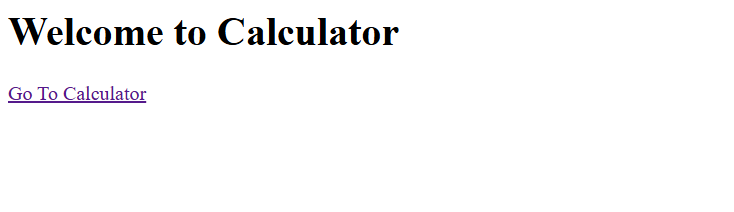

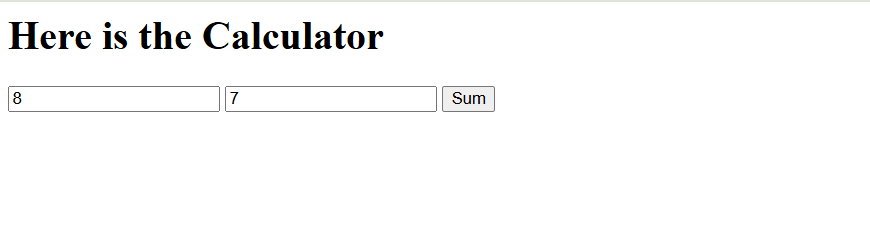

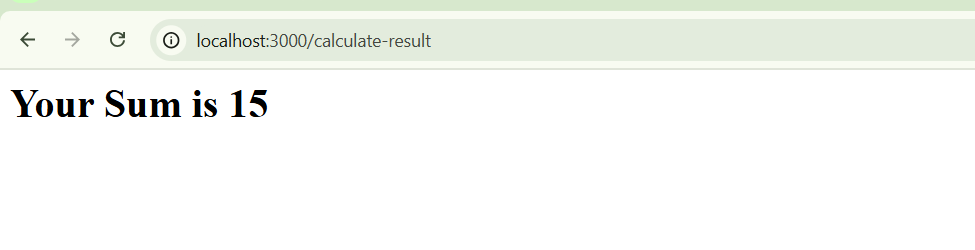